In [1]:
import torch
import numpy as np
import gpytorch
from gpytorch.kernels import RBFKernel
from ntwrk.bayesopt import BayesOpt
import matplotlib.pyplot as plt

In [2]:
torch.random.manual_seed(92)

In [3]:
def true_func(xx):
    return torch.sin(xx * 4) + torch.sin(xx * 8)

In [4]:
xx = torch.linspace(0, 1)

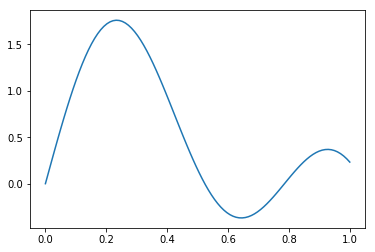

In [5]:
plt.plot(xx, true_func(xx).detach())
plt.show()

In [6]:
x = torch.rand(2)
y = true_func(x)

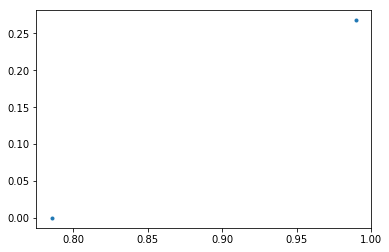

In [7]:
plt.plot(x, y, linestyle="None", marker=".")
plt.show()

In [8]:
bo = BayesOpt(x, y, max_x=1.)

In [9]:
bo.train_surrogate(iters=200)

In [10]:
bo.surrogate_lh.eval();
bo.surrogate.eval();

test_points = torch.linspace(0, 1., 1000).float()
test_dist = bo.surrogate_lh(bo.surrogate(test_points))

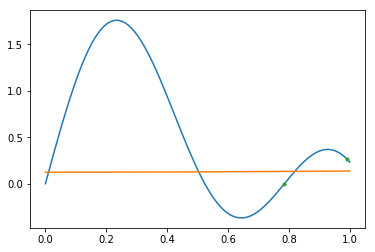

In [11]:
plt.plot(xx, true_func(xx).detach())
plt.plot(test_points, test_dist.mean.detach())
plt.plot(x, y.detach(), marker='.', linestyle="None")
plt.show()


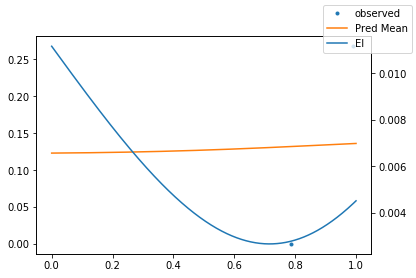

hitting boundary


tensor(0.)

In [12]:
bo.acquire()

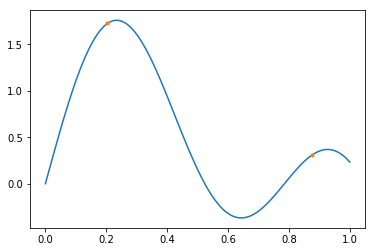

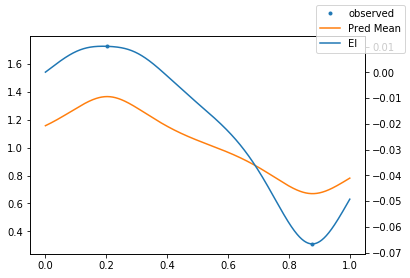

tensor([0.1882])


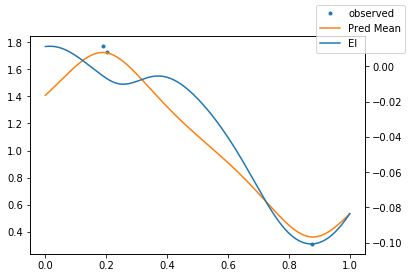

tensor([0.0140])


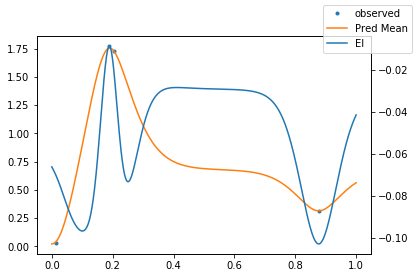

tensor([0.1892])


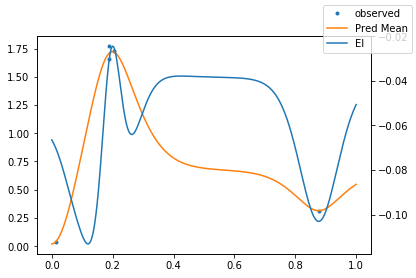

tensor([0.2002])


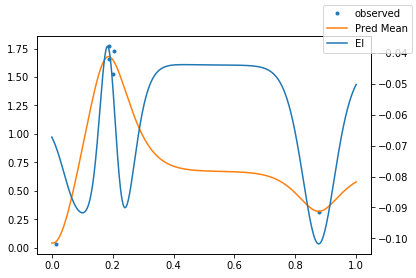

tensor([0.1832])


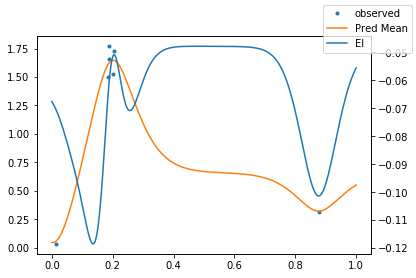

tensor([0.4765])


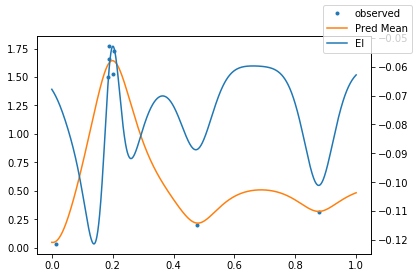

tensor([0.2012])


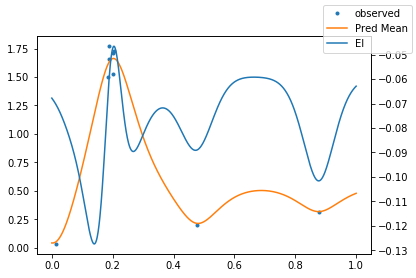

tensor([0.2042])


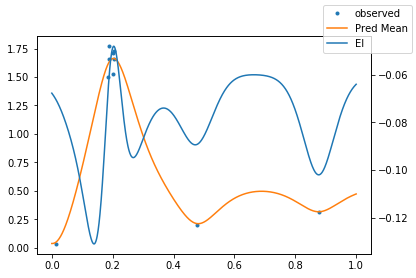

tensor([0.2032])


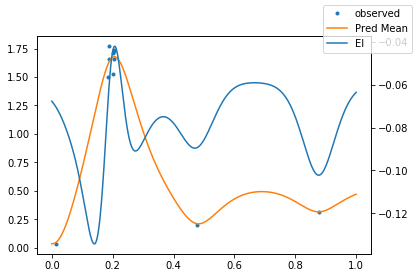

tensor([0.2072])


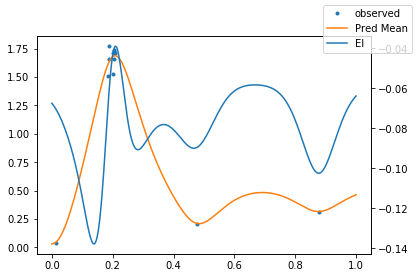

tensor([0.2092])


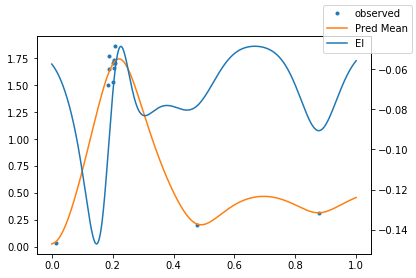

tensor([0.6667])


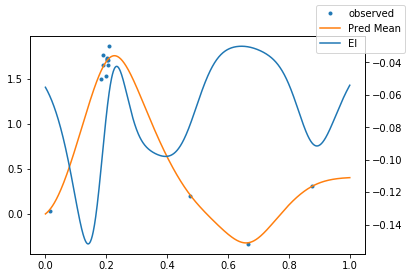

tensor([0.6446])


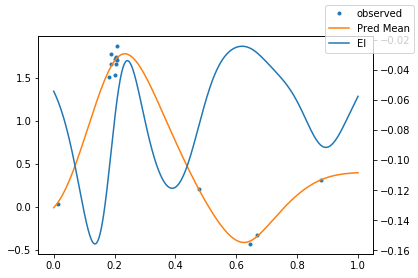

tensor([0.6196])


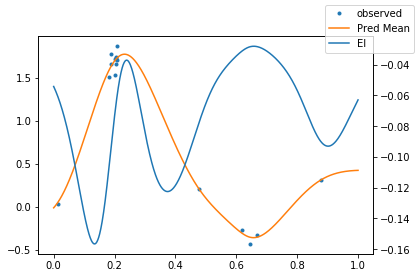

tensor([0.6577])


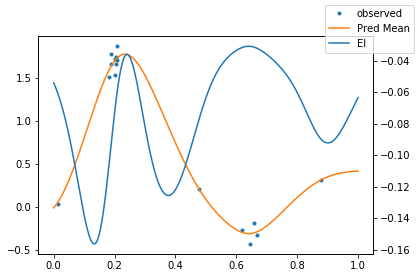

tensor([0.6406])


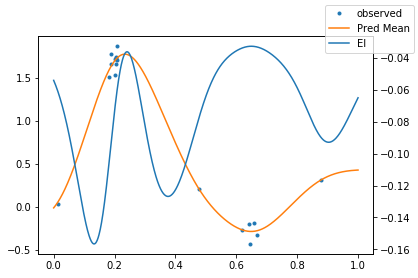

tensor([0.6496])


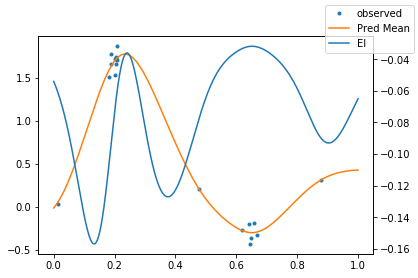

tensor([0.6517])


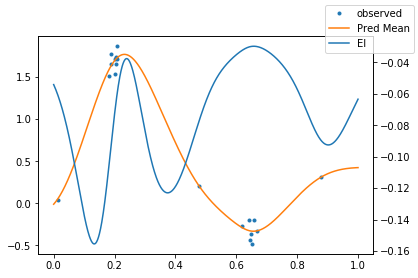

tensor([0.6577])


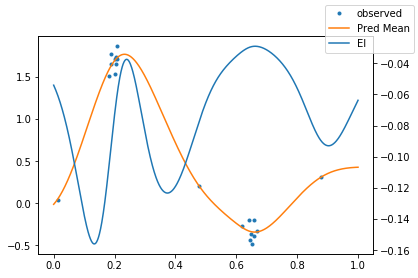

tensor([0.6617])


In [13]:
rate = torch.rand(2)
rwrd = true_func(rate)
bo = BayesOpt(rate, rwrd, max_x=1.)

plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()

rnds = 20

for ii in range(rnds):
    bo.train_surrogate(iters=200)
    next_rate = bo.acquire(explore=0.01).unsqueeze(0)
    rwrd = true_func(next_rate) + torch.randn(1)*0.1
    print(next_rate)
    bo.update_obs(next_rate, rwrd)
    
    bo.surrogate_lh.eval();
    bo.surrogate.eval();

    test_points = torch.linspace(0, 1., 1000).float()
    test_dist = bo.surrogate_lh(bo.surrogate(test_points))
    
#     plt.plot(xx, true_func(xx).detach(), label="Truth")
#     plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
#     plt.plot(test_points, test_dist.mean.detach(), label="Pred mean")
#     plt.legend()
#     plt.show()

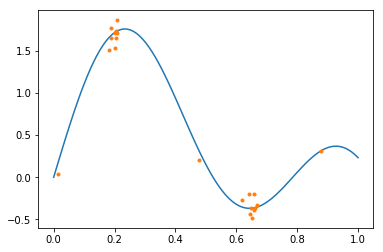

In [14]:
plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()